# Machine Learning Chapter 1
Author: Toby Sherwood
Date: 12/7/18, 19/7/18, 22/7/18

Aims: 
 - To Code and well document a full ML process from data import to results
 - One pass should involve mainy copying code and understanding flow
 - Second Pass should be applying Learnings and doing excersises 
 - Subsequent passes should be able to apply modified techniques depending on the Data 
     - Use Biometric

In [184]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [183]:
print(DOWNLOAD_ROOT)

https://raw.githubusercontent.com/ageron/handson-ml/master/


In [121]:
housing = fetch_housing_data()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [186]:
housing = load_housing_data()
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [123]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26    

In [124]:
housing["ocean_proximity"].value_counts()
# Command to show the counts for each of the unique values within the field 'ocean proximity'

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [125]:
housing.describe()
# To show a summary of the numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


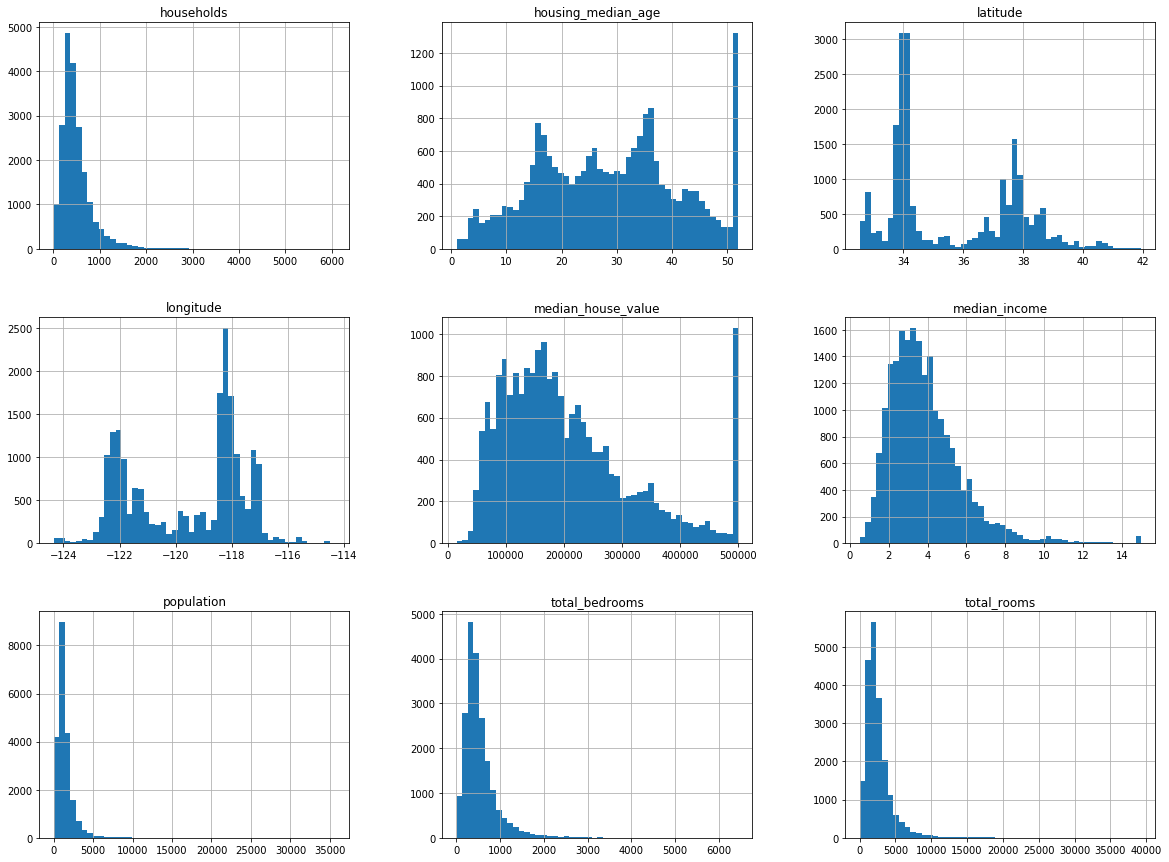

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [127]:
#Creating the test set
import numpy as np 

def split_train_test(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indicies = shuffled_indicies[:test_set_size]
    train_indicies = shuffled_indicies[test_set_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [128]:
# Using the Spliting function 
'''Issues splitting the set in this way are that it chooses a different test set every time and will eventually see
all the data.'''
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [129]:
#Alternative Test Set splitting function 
'''Using the indicies of the data to decide if it can be used in the set, with this solution no row can be deleted
or added but must be appeneded at the bottom of the set'''
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [130]:
#Since Housing has no unique ID, row index is used
housing_with_id = housing.reset_index() #adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [131]:
# Could combine a stable variable with index to create unique ID 
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [132]:
# A third option for splitting test data is to use scikitlearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [133]:
# Creating 'Income' categories 
housing["income_cat"] = np.ceil(housing["median_income"] /1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)



In [134]:
#Stratified Sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [135]:
#Veiwing the Categories 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [136]:
#Removing the income_cat so the data is back in its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [137]:
#Discover and Visualise Data 

#First taking a copy of the training set and leaving the test set alone
housing = strat_train_set.copy()

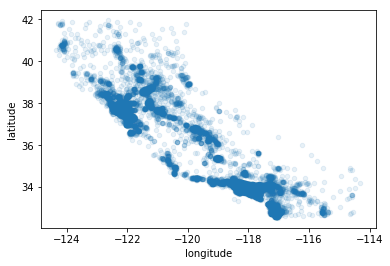

In [138]:
#Visualising Geographical Data 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

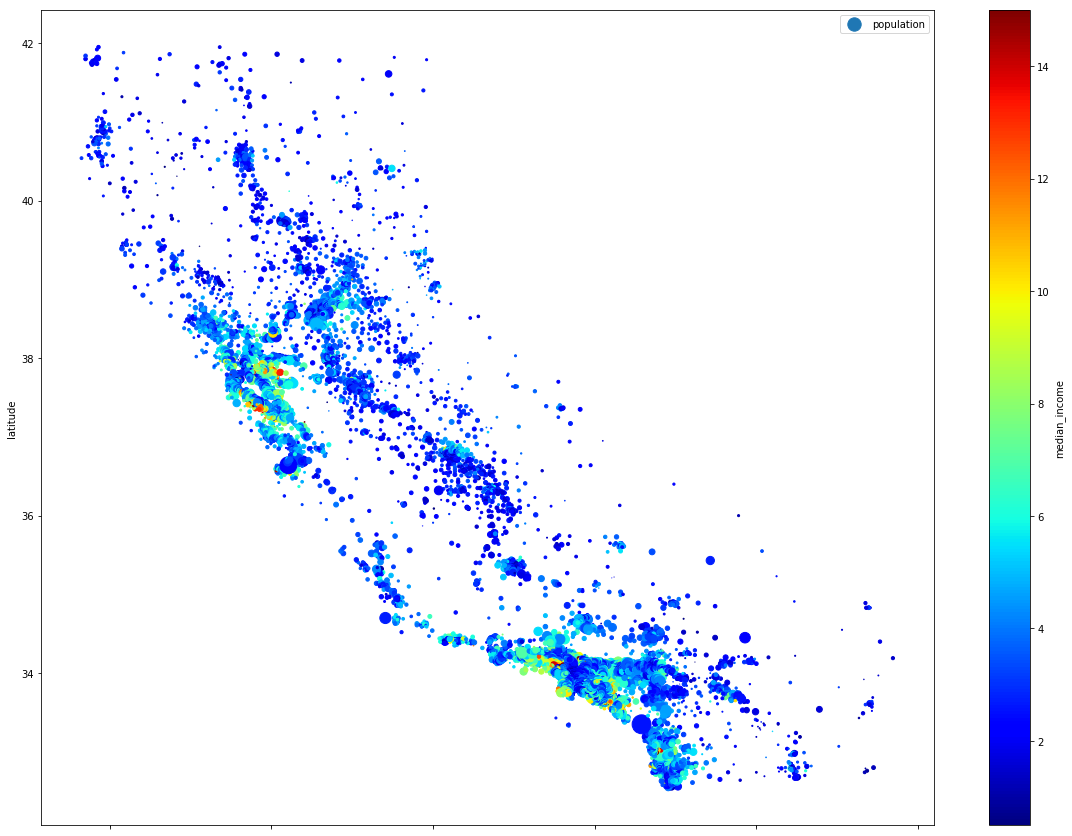

In [187]:
#Hosuing prices with a more informative plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1, 
            s=housing["population"]/100, label="population", figsize=(20,15),
            c="median_income", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [140]:
#Looking for Correlations 
'''Can easily find correlations between every pair of attributes using corr'''
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)
'''remember correlation is only linear corrs'''

'remember correlation is only linear corrs'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19547208>,
      dtype=object)

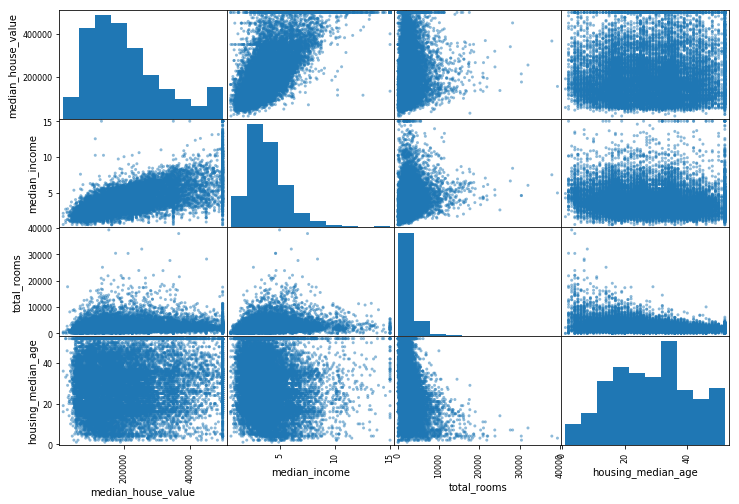

In [141]:
#Checking for correlation with pandas 
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", 
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [157]:
# preparing the data for ML
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [143]:
#Data Cleaning
'''Most MLs cannot work with missing features, so before starting clean them up by 
get rid of coresponding disricts
get rid of attribute
set the values to some value(mean, zero, median)'''
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [144]:
# Or by using sklearns built in imputer function 
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

#median can only be found for numeric variabes so Ocean proximity has to be dropped
housing_num = housing.drop("ocean_proximity", axis=1)

In [145]:
#Imputer can now be used
imputer.fit(housing_num)

#Imputer stats
imputer.statistics_

housing_num.median().values

#replace missing values with learned values
x= imputer.transform(housing_num)

#Put medians back into dataset
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [146]:
#Handling Text and Categorical Data
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [147]:
#Encoding the categorical data 
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]
#displays housing categories
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [148]:
#Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
'''If the category has lots of categories eg profession/species then the resulting matrix will be large and may slow down training
Consider using embeded'''

'If the category has lots of categories eg profession/species then the resulting matrix will be large and may slow down training\nConsider using embeded'

In [149]:
#Adding HyperParameters through custom transfer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no args or kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, x, y=None):
        return self #nothing else to do
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] /x[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix] / x[:,rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [150]:
#Feature Scaling
#Normalisation 
# Standardization 

In [151]:
#Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [152]:
#There is nothing in Scikit learn to deal with Pandas Dataframes so a cutom transformer can be written
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values
        

In [153]:
#The same can be done for a categorical encoder
import category_encoders as ce

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', ce.OneHotEncoder())
     ])


# Replaced CategoricalEncoders with categorical_encoders and One hot not sure the effect yet 


In [154]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline" , cat_pipeline)
])

In [155]:
#Running the whole pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  1.        ,
         0.        ,  0.        ]])

In [158]:
#Selecting and Training the model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Issues with 'Parallel' and the LinearRegression Model not being imported correctly

In [161]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [163]:
#Measuring the modles RMSE (errror)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [188]:
# Training a decision TREE

from sklearn.tree import DecisionTreeClassifier

#Issues with SKlearn.tree and Dtype. skipping section 


AttributeError: module 'sklearn.tree._tree' has no attribute 'DTYPE'

In [181]:
# Random Forrest 
from sklearn.ensemble import RandomForrestRegressor

AttributeError: module 'sklearn.tree._tree' has no attribute 'DTYPE'

Since Errors with decision trees is being seen, errors also occur with random forrests and so the end of the section has been skipped unitl A solid internet connection can be used to diagnose the issue